# Notebook Overview

In this notebook, we perform an Exploratory Data Analysis on a dataset that classifies patients in the ICU that will develop Sepsis and those that will not develop Sepsis


# Set Up



**Installation**

Here is the section where we installed all the packages/libraries that will be needed to tackle the challlenge.

In [1]:
# Installatin of p#ackages
#!pip install numpy
#!pip install pandas
#!pip install patool
#!pip install forex_python
#!pip install pandas_profiling
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 
#!pip install -U imbalanced-learn

# Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [96]:
# Data handling
import pandas as pd
import numpy as np
from statistics import mean
from forex_python.converter import CurrencyRates
from babel.numbers import format_currency
import datetime as dt

# Statistics
from scipy import stats
from scipy.stats import shapiro, trim_mean, mstats, mode
from scipy.stats import ttest_ind


# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn


# balance data
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Machine learning libraries and metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, LabelEncoder, Binarizer
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score,roc_curve, auc,roc_auc_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor
# Other packages
import os
import warnings
warnings.filterwarnings('ignore')
import patoolib
import pickle
from sklearn.pipeline import Pipeline

# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [3]:
test_df= pd.read_csv(r"C:\Users\GilB\OneDrive\Documents\Git Repo\Machine-Learning-API-using-FastAPI\datasets\Paitients_Files_Test.csv")
train_df= pd.read_csv(r"C:\Users\GilB\OneDrive\Documents\Git Repo\Machine-Learning-API-using-FastAPI\datasets\Paitients_Files_Train.csv")                           
                           

# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

## Dataset overview

Have a look at the loaded datsets using the following methods: `.head(), .info()`

In [4]:
# A quick look at the shape of our dataset

train_df.shape

(599, 11)

In [5]:
#Looking at the head of our dataset

train_df.head()

ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
0  ICU200010    6  148  72  35    0  33.6  0.627   50          0  Positive
1  ICU200011    1   85  66  29    0  26.6  0.351   31          0  Negative
2  ICU200012    8  183  64   0    0  23.3  0.672   32          1  Positive
3  ICU200013    1   89  66  23   94  28.1  0.167   21          1  Negative
4  ICU200014    0  137  40  35  168  43.1  2.288   33          1  Positive

In [6]:
#Taking a look at the tail
train_df.tail()

ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
594  ICU200604    6  123  72  45  230  33.6  0.733   34          0  Negative
595  ICU200605    0  188  82  14  185  32.0  0.682   22          1  Positive
596  ICU200606    0   67  76   0    0  45.3  0.194   46          1  Negative
597  ICU200607    1   89  24  19   25  27.8  0.559   21          0  Negative
598  ICU200608    1  173  74   0    0  36.8  0.088   38          1  Positive

##### Description of Columns 

ID	-	Unique number to represent patient ID

PRG - 	Plasma glucose

PL	-	Blood Work Result-1 (mu U/ml)

PR	-	Blood Pressure (mm Hg) 

SK	-	Blood Work Result-2 (mm)

TS	-   Blood Work Result-3 (mu U/ml)

M11	-	Body mass index (weight in kg/(height in m)^2

BD2	-	Blood Work Result-4 (mu U/ml)

Age	-	patients age (years)

Insurance	- If a patient holds a valid insurance card

Sepssis	Target	Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise

In [7]:
#Look at the columns in the dataset and their data types

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [8]:
#Get more details about the features of our data
train_df.describe()

PRG          PL          PR          SK          TS         M11  \
count  599.000000  599.000000  599.000000  599.000000  599.000000  599.000000   
mean     3.824708  120.153589   68.732888   20.562604   79.460768   31.920033   
std      3.362839   32.682364   19.335675   16.017622  116.576176    8.008227   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   64.000000    0.000000    0.000000   27.100000   
50%      3.000000  116.000000   70.000000   23.000000   36.000000   32.000000   
75%      6.000000  140.000000   80.000000   32.000000  123.500000   36.550000   
max     17.000000  198.000000  122.000000   99.000000  846.000000   67.100000   

              BD2         Age   Insurance  
count  599.000000  599.000000  599.000000  
mean     0.481187   33.290484    0.686144  
std      0.337552   11.828446    0.464447  
min      0.078000   21.000000    0.000000  
25%      0.248000   24.000000    0.000000  
50%      0.383000   29.000000    1.000000  
75%      0.647000   40.000000    1.000000  
max      2.420000   81.000000    1.000000

In [9]:
#Check for missing values
train_df.isna().sum()



ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

<AxesSubplot: >

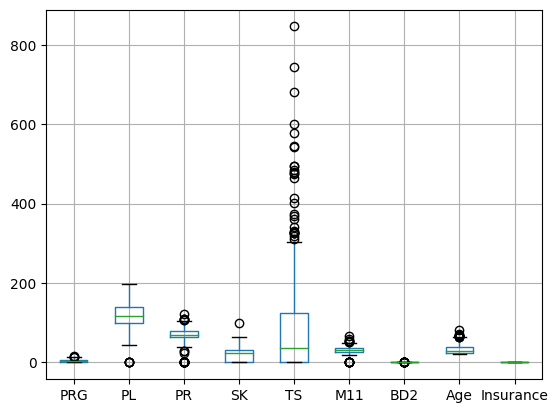

In [10]:
#Check for outliers
train_df.boxplot()

## Issues With the Data


Too many zeros in each column

The column names are not very descriptive.

The target variable 'Sepssis' may have imbalanced classes.

There are many outliers in some of the numerical columns.

There could be correlations between some of the predictor variables, leading to multicollinearity.


## How I Intend to Solve Them

Replace zeros in each column with the median value

Rename the column names to be more descriptive and easier to understand.

Handle the imbalanced classes in the target variable using techniques such as undersampling or oversampling.

Use visualization techniques such as box plots and scatter plots to identify and handle any outliers.

Use correlation analysis to identify highly correlated variables and consider dropping or transforming them.

## Hypothesis

***Null Hypothesis:*** Age does not determine whether a patient will develop Sepssis

***Alternate Hypothesis:*** Age determines whether a pateint will develop Sepssis

##  Questions

1. Is the train dataset complete?
2. What are the ages of the youngest and oldest patients?
3. What are the youngest and oldest patients with Sepssis?
4. What is the average age ?
5. What is the ratio of patients who are positive for sepssis to the negative patients ?
6. What is the highest and lowest BMI?
7. What is the average BMI ?
8. Is there a corelation between the Sepssis status and the other attributes? 

## Data Cleaning 

In [11]:
# First Rename the columns
train_df = train_df.rename(columns={
    "PRG": "Plasma_glucose",
    "PL": "Blood_Work_R1",
    "PR": "Blood_Pressure",
    "SK": "Blood_Work_R2",
    "TS": "Blood_Work_R3",
    "M11": "BMI",
    "BD2": "Blood_Work_R4",
    "Age": "Patient_age",
    "Sepssis": "Target"
})

In [12]:
numerical_features = ['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2', 'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Patient_age']

##### Removing the rows where BMI is 0 

In [13]:
# Lets inspect our dataset again
train_df

ID  Plasma_glucose  Blood_Work_R1  Blood_Pressure  Blood_Work_R2  \
0    ICU200010               6            148              72             35   
1    ICU200011               1             85              66             29   
2    ICU200012               8            183              64              0   
3    ICU200013               1             89              66             23   
4    ICU200014               0            137              40             35   
..         ...             ...            ...             ...            ...   
594  ICU200604               6            123              72             45   
595  ICU200605               0            188              82             14   
596  ICU200606               0             67              76              0   
597  ICU200607               1             89              24             19   
598  ICU200608               1            173              74              0   

     Blood_Work_R3   BMI  Blood_Work_R4  Patient_age  Insurance    Target  
0                0  33.6          0.627           50          0  Positive  
1                0  26.6          0.351           31          0  Negative  
2                0  23.3          0.672           32          1  Positive  
3               94  28.1          0.167           21          1  Negative  
4              168  43.1          2.288           33          1  Positive  
..             ...   ...            ...          ...        ...       ...  
594            230  33.6          0.733           34          0  Negative  
595            185  32.0          0.682           22          1  Positive  
596              0  45.3          0.194           46          1  Negative  
597             25  27.8          0.559           21          0  Negative  
598              0  36.8          0.088           38          1  Positive  

[599 rows x 11 columns]

A glance at our dataset shows the value 0 in some of the columns. This can not be possible and indicates the presence of wrong vaules in our dataset. Lets first remove 0 BMIs and replace the other 0 values in the columns with the median.

In [14]:
#Extracting rows with 0 BMI
zero_bmi = train_df[train_df['BMI']==0.0]
zero_bmi

ID  Plasma_glucose  Blood_Work_R1  Blood_Pressure  Blood_Work_R2  \
9    ICU200019               8            125              96              0   
49   ICU200059               7            105               0              0   
60   ICU200070               2             84               0              0   
81   ICU200091               2             74               0              0   
145  ICU200155               0            102              75             23   
371  ICU200381               0            118              64             23   
426  ICU200436               0             94               0              0   
494  ICU200504               3             80               0              0   
522  ICU200532               6            114               0              0   

     Blood_Work_R3  BMI  Blood_Work_R4  Patient_age  Insurance    Target  
9                0  0.0          0.232           54          1  Positive  
49               0  0.0          0.305           24          0  Negative  
60               0  0.0          0.304           21          0  Negative  
81               0  0.0          0.102           22          1  Negative  
145              0  0.0          0.572           21          1  Negative  
371             89  0.0          1.731           21          1  Negative  
426              0  0.0          0.256           25          0  Negative  
494              0  0.0          0.174           22          1  Negative  
522              0  0.0          0.189           26          1  Negative

In [15]:
# Removing rows with 0 BMI
train_df.drop(train_df[train_df['BMI'] == 0.0].index, inplace=True)

In [16]:
#confirming that all 0 BMIs have been removed from our dataset
zero_bmi2 = train_df[train_df['BMI']==0.0]
zero_bmi2

Empty DataFrame
Columns: [ID, Plasma_glucose, Blood_Work_R1, Blood_Pressure, Blood_Work_R2, Blood_Work_R3, BMI, Blood_Work_R4, Patient_age, Insurance, Target]
Index: []

##### Replace zeros in other  columns  with the median value

In [17]:
# Another look at our dataset shows that most of our columns have 0 for values.
train_df

ID  Plasma_glucose  Blood_Work_R1  Blood_Pressure  Blood_Work_R2  \
0    ICU200010               6            148              72             35   
1    ICU200011               1             85              66             29   
2    ICU200012               8            183              64              0   
3    ICU200013               1             89              66             23   
4    ICU200014               0            137              40             35   
..         ...             ...            ...             ...            ...   
594  ICU200604               6            123              72             45   
595  ICU200605               0            188              82             14   
596  ICU200606               0             67              76              0   
597  ICU200607               1             89              24             19   
598  ICU200608               1            173              74              0   

     Blood_Work_R3   BMI  Blood_Work_R4  Patient_age  Insurance    Target  
0                0  33.6          0.627           50          0  Positive  
1                0  26.6          0.351           31          0  Negative  
2                0  23.3          0.672           32          1  Positive  
3               94  28.1          0.167           21          1  Negative  
4              168  43.1          2.288           33          1  Positive  
..             ...   ...            ...          ...        ...       ...  
594            230  33.6          0.733           34          0  Negative  
595            185  32.0          0.682           22          1  Positive  
596              0  45.3          0.194           46          1  Negative  
597             25  27.8          0.559           21          0  Negative  
598              0  36.8          0.088           38          1  Positive  

[590 rows x 11 columns]

In [18]:
columns_with_too_many_zeros = ['Plasma_glucose', 'Blood_Work_R2', 'Blood_Work_R3']
for col in columns_with_too_many_zeros:
    train_df[col].replace(to_replace=0, value=train_df[col].median(), inplace=True)

In [19]:
train_df

ID  Plasma_glucose  Blood_Work_R1  Blood_Pressure  Blood_Work_R2  \
0    ICU200010               6            148              72             35   
1    ICU200011               1             85              66             29   
2    ICU200012               8            183              64             23   
3    ICU200013               1             89              66             23   
4    ICU200014               3            137              40             35   
..         ...             ...            ...             ...            ...   
594  ICU200604               6            123              72             45   
595  ICU200605               3            188              82             14   
596  ICU200606               3             67              76             23   
597  ICU200607               1             89              24             19   
598  ICU200608               1            173              74             23   

     Blood_Work_R3   BMI  Blood_Work_R4  Patient_age  Insurance    Target  
0               39  33.6          0.627           50          0  Positive  
1               39  26.6          0.351           31          0  Negative  
2               39  23.3          0.672           32          1  Positive  
3               94  28.1          0.167           21          1  Negative  
4              168  43.1          2.288           33          1  Positive  
..             ...   ...            ...          ...        ...       ...  
594            230  33.6          0.733           34          0  Negative  
595            185  32.0          0.682           22          1  Positive  
596             39  45.3          0.194           46          1  Negative  
597             25  27.8          0.559           21          0  Negative  
598             39  36.8          0.088           38          1  Positive  

[590 rows x 11 columns]

#### Checking for Outliers

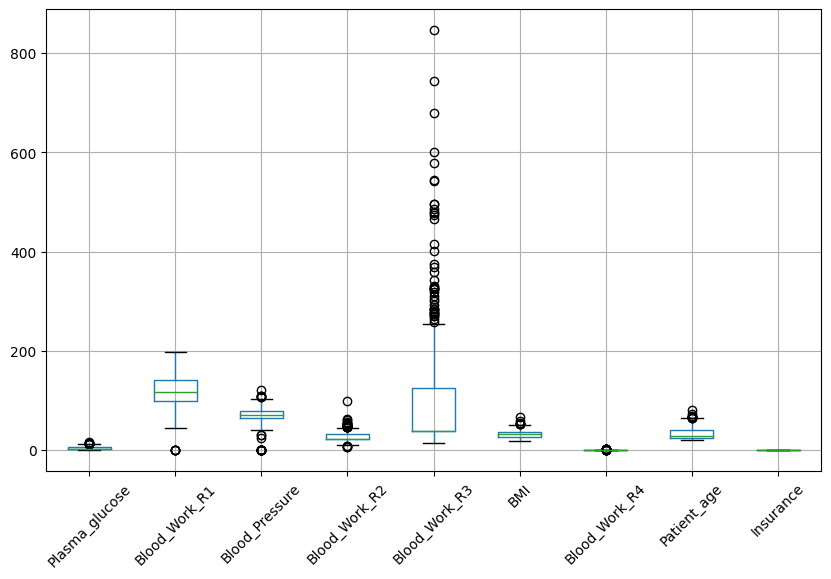

In [20]:
plt.figure(figsize=(10, 6))

# Plot the boxplot
train_df.boxplot()

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Display the plot
plt.show()

The box plots of the various columns as visualized above, shows the presence of outliers in our data.
Outliers can skew the results of machine learning models and make them less accurate and reliable. 

In [21]:
Q1 = train_df.quantile(0.25)
Q3 = train_df.quantile(0.75)
IQR = Q3-Q1
IQR
((train_df< (Q1-1.5 * IQR)) | (train_df > (Q3 + 1.5 * IQR))).any()

BMI                True
Blood_Pressure     True
Blood_Work_R1      True
Blood_Work_R2      True
Blood_Work_R3      True
Blood_Work_R4      True
ID                False
Insurance         False
Patient_age        True
Plasma_glucose     True
Target            False
dtype: bool

All the columns except ID, Insurance and the Target Column have outliers.

#### Calculating the Interquartile range, setting the outlier boundary and removing the outliers from the dataframe

In [22]:
# Specify the columns of interest
columns_of_interest =  ['BMI', 'Blood_Pressure', 'Blood_Work_R1','Blood_Work_R2','Blood_Work_R3','Blood_Work_R4','Patient_age','Plasma_glucose']

# Check if outliers still exist in the columns
outliers_exist = False

for column in columns_of_interest:
    # Calculate the first and third quartiles (Q1 and Q3)
    Q1 = train_df[column].quantile(0.25)
    Q3 = train_df[column].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Modify the values in the column to be within the range
    train_df[column] = train_df[column].clip(lower_bound, upper_bound)

    # Check if outliers exist in the column
    if (train_df[column] < lower_bound).any() or (train_df[column] > upper_bound).any():
        outliers_exist = True
        print(f"Outliers still exist in '{column}'.")

if not outliers_exist:
    print("No outliers exist in the specified columns.")


No outliers exist in the specified columns.


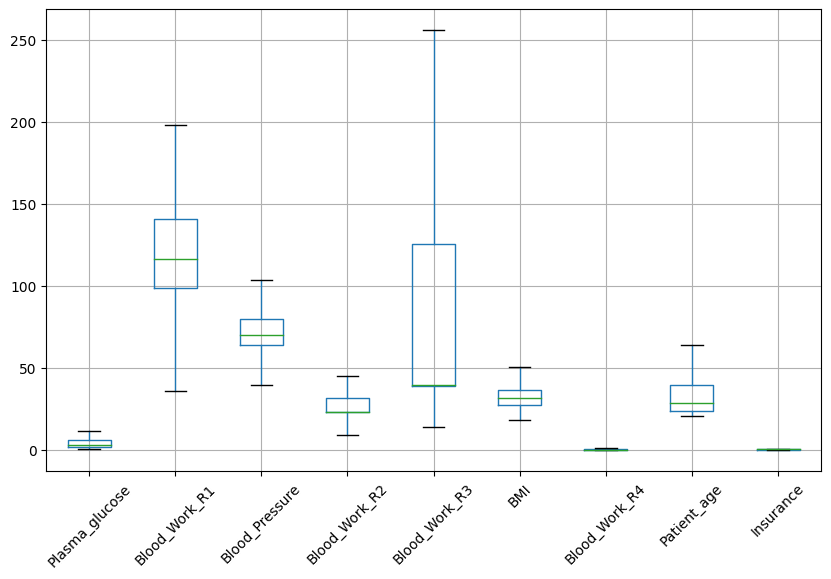

In [23]:
plt.figure(figsize=(10, 6))

# Plot the boxplot
train_df.boxplot()

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Display the plot
plt.show()

## Univariate Analysis

#### Positive Sepssis Cases 

In [24]:
positive_cases = train_df[train_df['Target'] == 'Positive']
positive_cases

ID  Plasma_glucose  Blood_Work_R1  Blood_Pressure  Blood_Work_R2  \
0    ICU200010               6            148              72           35.0   
2    ICU200012               8            183              64           23.0   
4    ICU200014               3            137              40           35.0   
6    ICU200016               3             78              50           32.0   
8    ICU200018               2            197              70           45.0   
..         ...             ...            ...             ...            ...   
588  ICU200598               3            176              86           27.0   
590  ICU200600              11            111              84           40.0   
592  ICU200602               3            132              80           23.0   
595  ICU200605               3            188              82           14.0   
598  ICU200608               1            173              74           23.0   

     Blood_Work_R3   BMI  Blood_Work_R4  Patient_age  Insurance    Target  
0           39.000  33.6       0.627000           50          0  Positive  
2           39.000  23.3       0.672000           32          1  Positive  
4          168.000  43.1       1.253375           33          1  Positive  
6           88.000  31.0       0.248000           26          0  Positive  
8          255.875  30.5       0.158000           53          1  Positive  
..             ...   ...            ...          ...        ...       ...  
588        156.000  33.3       1.154000           52          0  Positive  
590         39.000  46.8       0.925000           45          0  Positive  
592         39.000  34.4       0.402000           44          0  Positive  
595        185.000  32.0       0.682000           22          1  Positive  
598         39.000  36.8       0.088000           38          1  Positive  

[207 rows x 11 columns]

Age

In [25]:
positive_age_stats = positive_cases['Patient_age'].describe()
positive_age_stats 

count    207.000000
mean      36.589372
std       10.800058
min       21.000000
25%       28.000000
50%       35.000000
75%       43.000000
max       64.000000
Name: Patient_age, dtype: float64

In [26]:
no_positives= positive_age_stats['count']
print(f'The no of patients diagnosed with Sepssis is {no_positives}')

The no of patients diagnosed with Sepssis is 207.0


In [27]:
positive_mean_age = positive_age_stats['mean']
print(f'The mean age of patients with Sepssis is: {positive_mean_age:.2f} years')

The mean age of patients with Sepssis is: 36.59 years


In [28]:
highest_positive_age = positive_age_stats['max']
print(f'The oldest patient with Sepssis is {highest_positive_age} years old')

The oldest patient with Sepssis is 64.0 years old


In [29]:
lowest_positive_age = positive_age_stats['min']
print(f'The youngest patient with Sepssis is {lowest_positive_age} years old')

The youngest patient with Sepssis is 21.0 years old


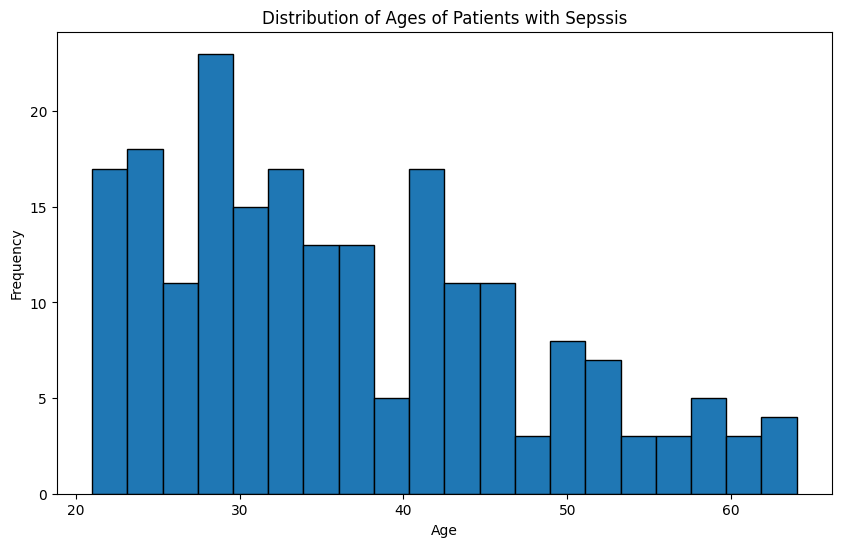

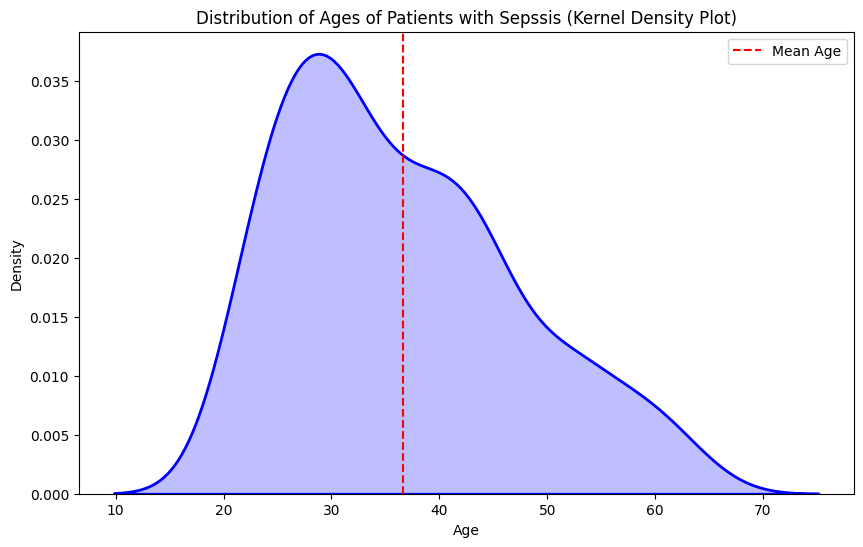

In [30]:
# Extract the 'age' column from the DataFrame
ages = positive_cases['Patient_age']

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(ages, bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages of Patients with Sepssis')
plt.show()

# Create a kernel density plot
plt.figure(figsize=(10, 6))
sn.kdeplot(ages, shade=True, color='blue', linewidth=2)
plt.axvline(positive_mean_age, color='red', linestyle='--', label='Mean Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Ages of Patients with Sepssis (Kernel Density Plot)')
plt.legend()
plt.show()

BMI

In [31]:
positive_bmi_stats = positive_cases['BMI'].describe()
positive_bmi_stats

count    207.000000
mean      35.378623
std        6.216960
min       22.900000
25%       31.050000
50%       34.300000
75%       39.050000
max       50.512500
Name: BMI, dtype: float64

In [32]:
positive_mean_bmi = positive_bmi_stats['mean']
print(f'The average BMI for patients with Sepssis is {positive_mean_bmi:.2f}')

The average BMI for patients with Sepssis is 35.38


In [33]:
highest_bmi = positive_bmi_stats['max']
print(f'The highest BMI for a patient with Sepssis is {highest_bmi}')

The highest BMI for a patient with Sepssis is 50.5125


In [34]:
lowest_positive_bmi = positive_bmi_stats['min']
print(f'The lowest BMI for a patient with Sepssis is {lowest_positive_bmi}')

The lowest BMI for a patient with Sepssis is 22.9


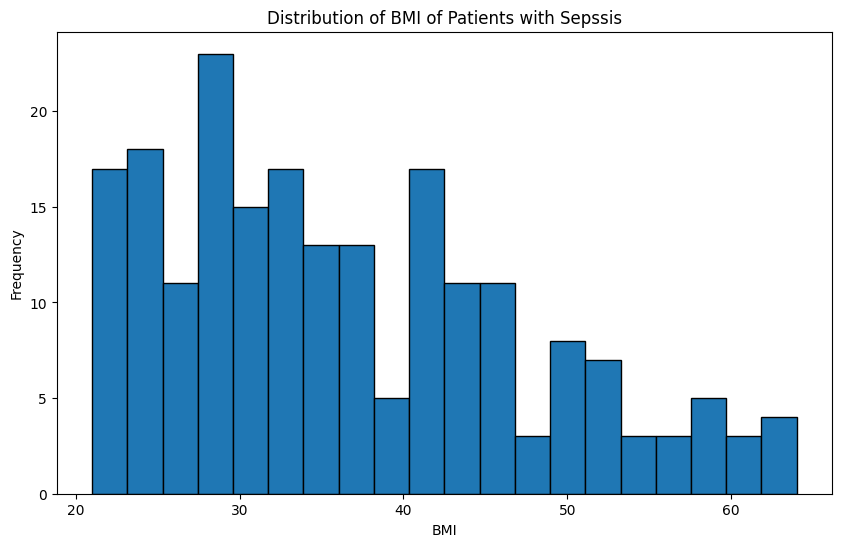

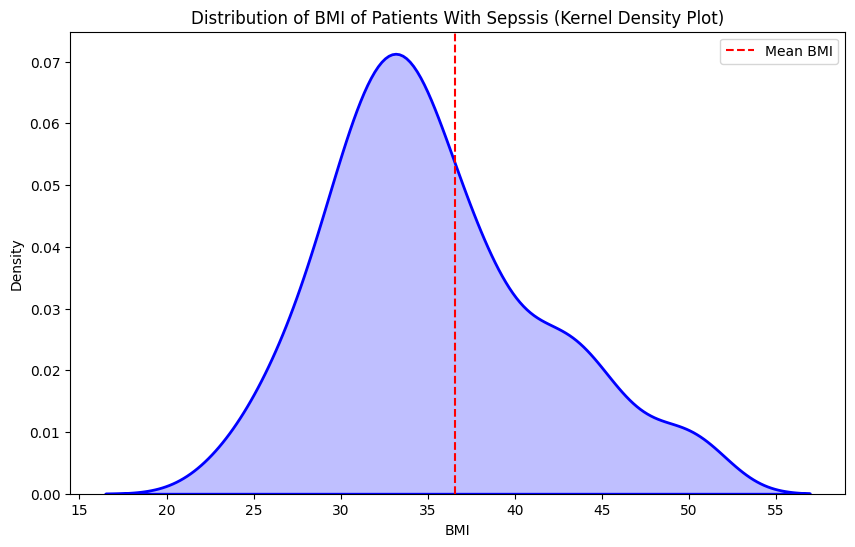

In [35]:
# Extract the BMI 'M11' column from the DataFrame
BMI = positive_cases['BMI']

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(ages, bins=20, edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI of Patients with Sepssis')
plt.show()

# Create a kernel density plot
plt.figure(figsize=(10, 6))
sn.kdeplot(BMI, shade=True, color='blue', linewidth=2)
plt.axvline(positive_mean_age, color='red', linestyle='--', label='Mean BMI')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('Distribution of BMI of Patients With Sepssis (Kernel Density Plot)')
plt.legend()
plt.show()

#### Negative Sepssis Cases

AGE

In [36]:
negative_cases = train_df[train_df['Target'] == 'Negative']
negative_cases

ID  Plasma_glucose  Blood_Work_R1  Blood_Pressure  Blood_Work_R2  \
1    ICU200011               1             85              66           29.0   
3    ICU200013               1             89              66           23.0   
5    ICU200015               5            116              74           23.0   
7    ICU200017              10            115              40           23.0   
10   ICU200020               4            110              92           23.0   
..         ...             ...            ...             ...            ...   
591  ICU200601               2            112              78           45.5   
593  ICU200603               2             82              52           22.0   
594  ICU200604               6            123              72           45.0   
596  ICU200606               3             67              76           23.0   
597  ICU200607               1             89              40           19.0   

     Blood_Work_R3   BMI  Blood_Work_R4  Patient_age  Insurance    Target  
1             39.0  26.6       0.351000           31          0  Negative  
3             94.0  28.1       0.167000           21          1  Negative  
5             39.0  25.6       0.201000           30          1  Negative  
7             39.0  35.3       0.134000           29          1  Negative  
10            39.0  37.6       0.191000           30          0  Negative  
..             ...   ...            ...          ...        ...       ...  
591          140.0  39.4       0.175000           24          0  Negative  
593          115.0  28.5       1.253375           25          0  Negative  
594          230.0  33.6       0.733000           34          0  Negative  
596           39.0  45.3       0.194000           46          1  Negative  
597           25.0  27.8       0.559000           21          0  Negative  

[383 rows x 11 columns]

In [37]:
negative_age_stats = negative_cases['Patient_age'].describe()
negative_age_stats 

count    383.000000
mean      31.548303
std       11.612285
min       21.000000
25%       23.000000
50%       27.000000
75%       37.000000
max       64.000000
Name: Patient_age, dtype: float64

In [38]:
No_Negative = negative_age_stats['count']
print (f'No of patients without Sepssis is {No_Negative}')

No of patients without Sepssis is 383.0


In [39]:
mean_age = negative_age_stats['mean']
print(f'The mean age for patients without Sepssis is: {mean_age:.2f} years')


The mean age for patients without Sepssis is: 31.55 years


In [40]:
highest_negative_age = negative_age_stats['max']
print(f'The oldest patient without Sepssis is {highest_negative_age} years old')

The oldest patient without Sepssis is 64.0 years old


In [41]:
lowest_negative_age = negative_age_stats['min']
print(f'The youngest patient withot Sepssis is {lowest_negative_age} years old')

The youngest patient withot Sepssis is 21.0 years old


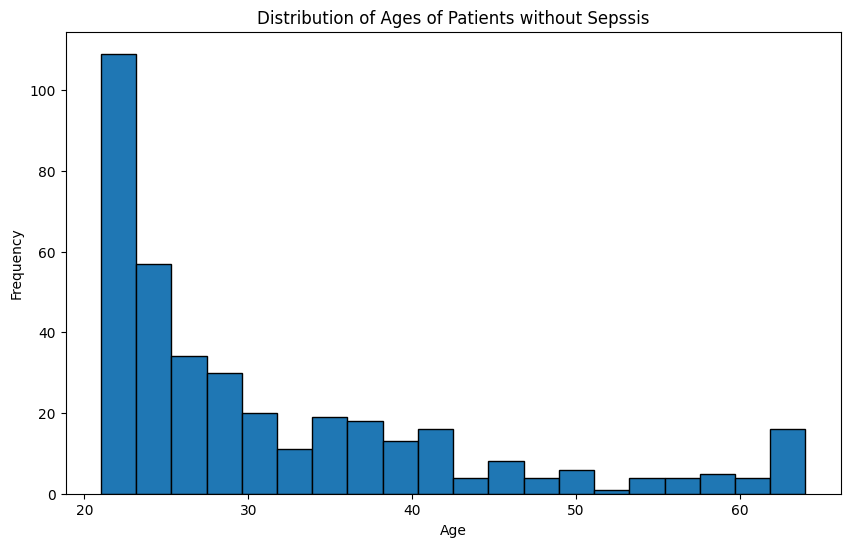

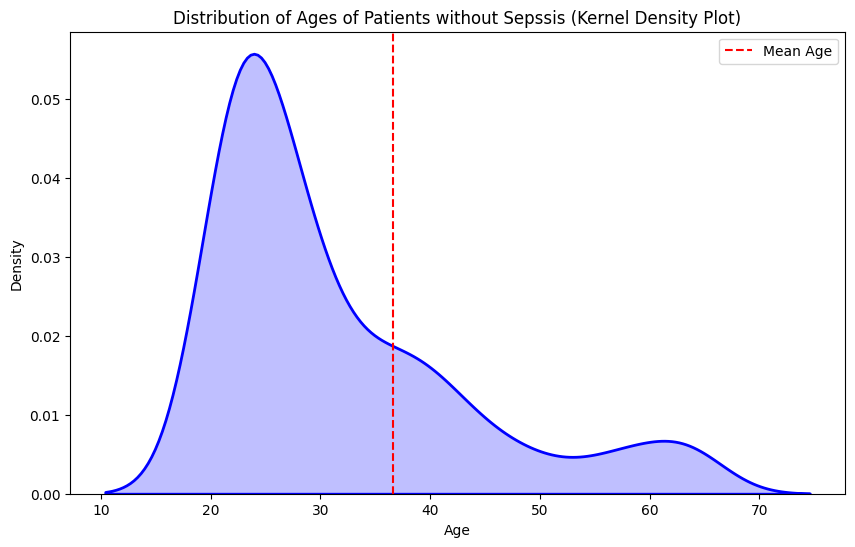

In [42]:
# Extract the 'age' column from the DataFrame
ages = negative_cases['Patient_age']

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(ages, bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages of Patients without Sepssis')
plt.show()

# Create a kernel density plot
plt.figure(figsize=(10, 6))
sn.kdeplot(ages, shade=True, color='blue', linewidth=2)
plt.axvline(positive_mean_age, color='red', linestyle='--', label='Mean Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Ages of Patients without Sepssis (Kernel Density Plot)')
plt.legend()
plt.show()

BMI

In [43]:
negative_bmi_stats = negative_cases['BMI'].describe()
negative_bmi_stats

count    383.000000
mean      30.700033
std        6.540889
min       18.200000
25%       25.450000
50%       30.100000
75%       35.150000
max       50.512500
Name: BMI, dtype: float64

In [44]:
negative_mean_bmi = negative_bmi_stats['mean']
print(f'The mean BMI for patients without Sepssis is: {negative_mean_bmi:.2f}')

The mean BMI for patients without Sepssis is: 30.70


In [45]:
highest_negative_bmi = negative_bmi_stats['max']
print(f'The highest BMI for a  patient without Sepssis is {highest_negative_bmi}')

The highest BMI for a  patient without Sepssis is 50.5125


In [46]:
lowest_negative_bmi = negative_bmi_stats['min']
print(f'The lowest BMI for a patient withot Sepssis is {lowest_negative_bmi}')

The lowest BMI for a patient withot Sepssis is 18.2


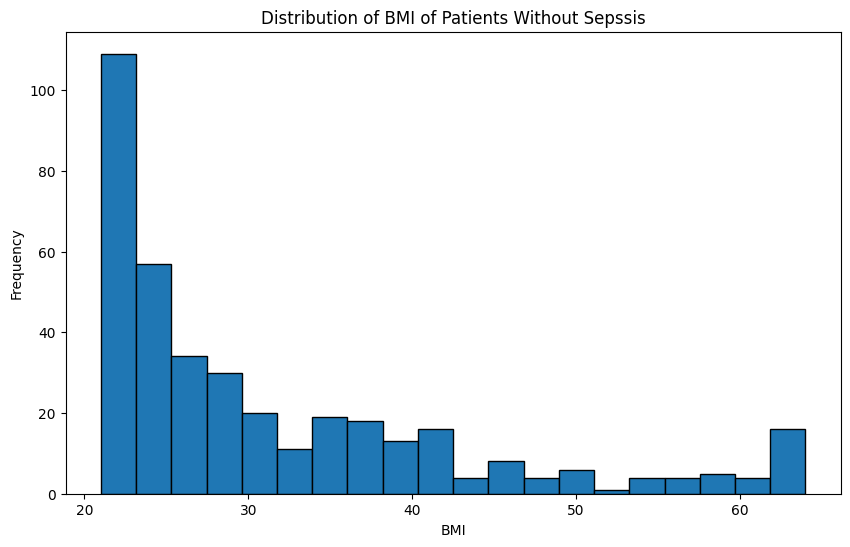

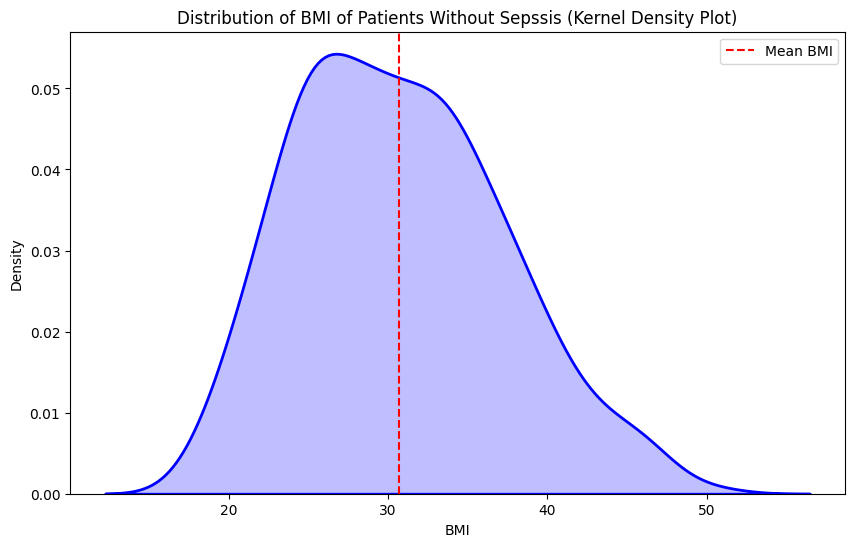

In [47]:
# Extract the BMI 'M11' column from the DataFrame
BMI = negative_cases['BMI']

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(ages, bins=20, edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI of Patients Without Sepssis')
plt.show()

# Create a kernel density plot
plt.figure(figsize=(10, 6))
sn.kdeplot(BMI, shade=True, color='blue', linewidth=2)
plt.axvline(negative_mean_bmi, color='red', linestyle='--', label='Mean BMI')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('Distribution of BMI of Patients Without Sepssis (Kernel Density Plot)')
plt.legend()
plt.show()

## Univariate Analysis

#### Graphically Displaying all other numerical columns using Histogram 

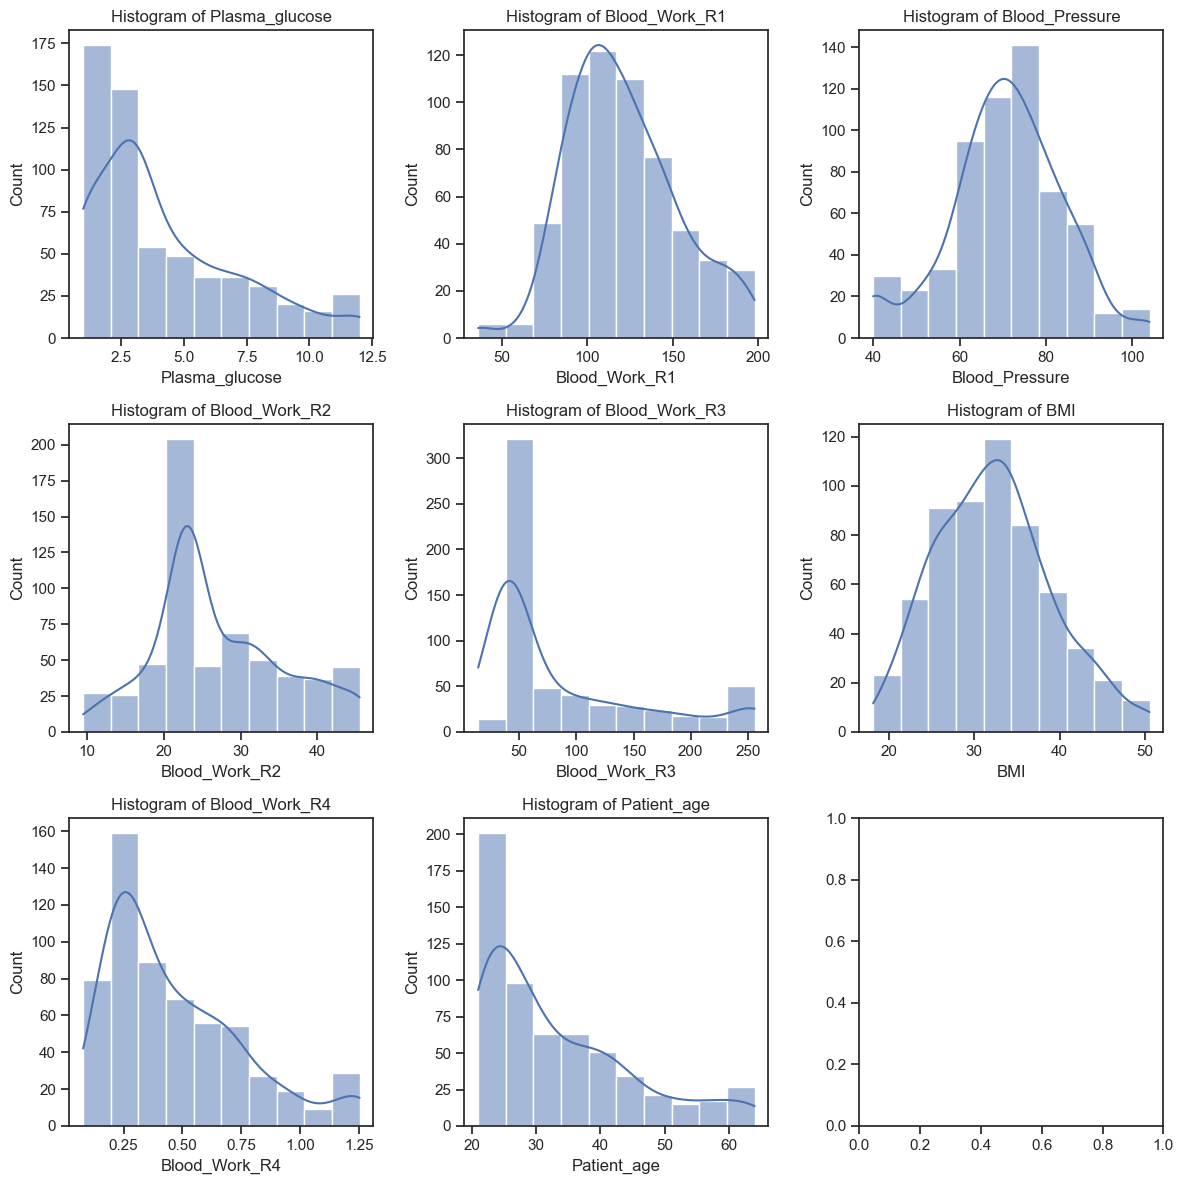

In [48]:
# Set the style for the plot
sn.set(style="ticks", color_codes=True)

# Create a grid of 3 by 3 subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Flatten the axes array
axes = axes.flatten()

# Plot histograms for each numerical column
for i, col in enumerate(numerical_features):
    sn.histplot(data=train_df, x=col, kde=True, bins=10, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

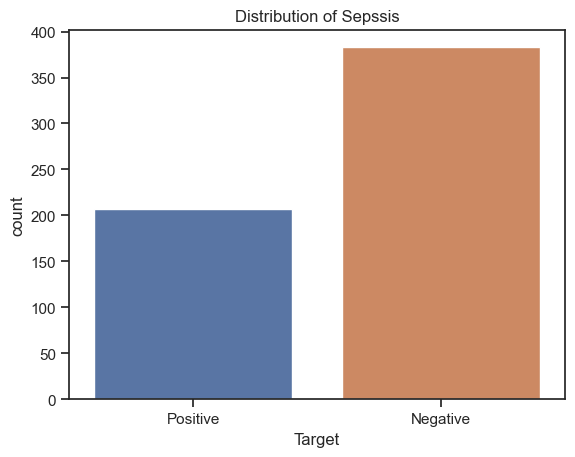

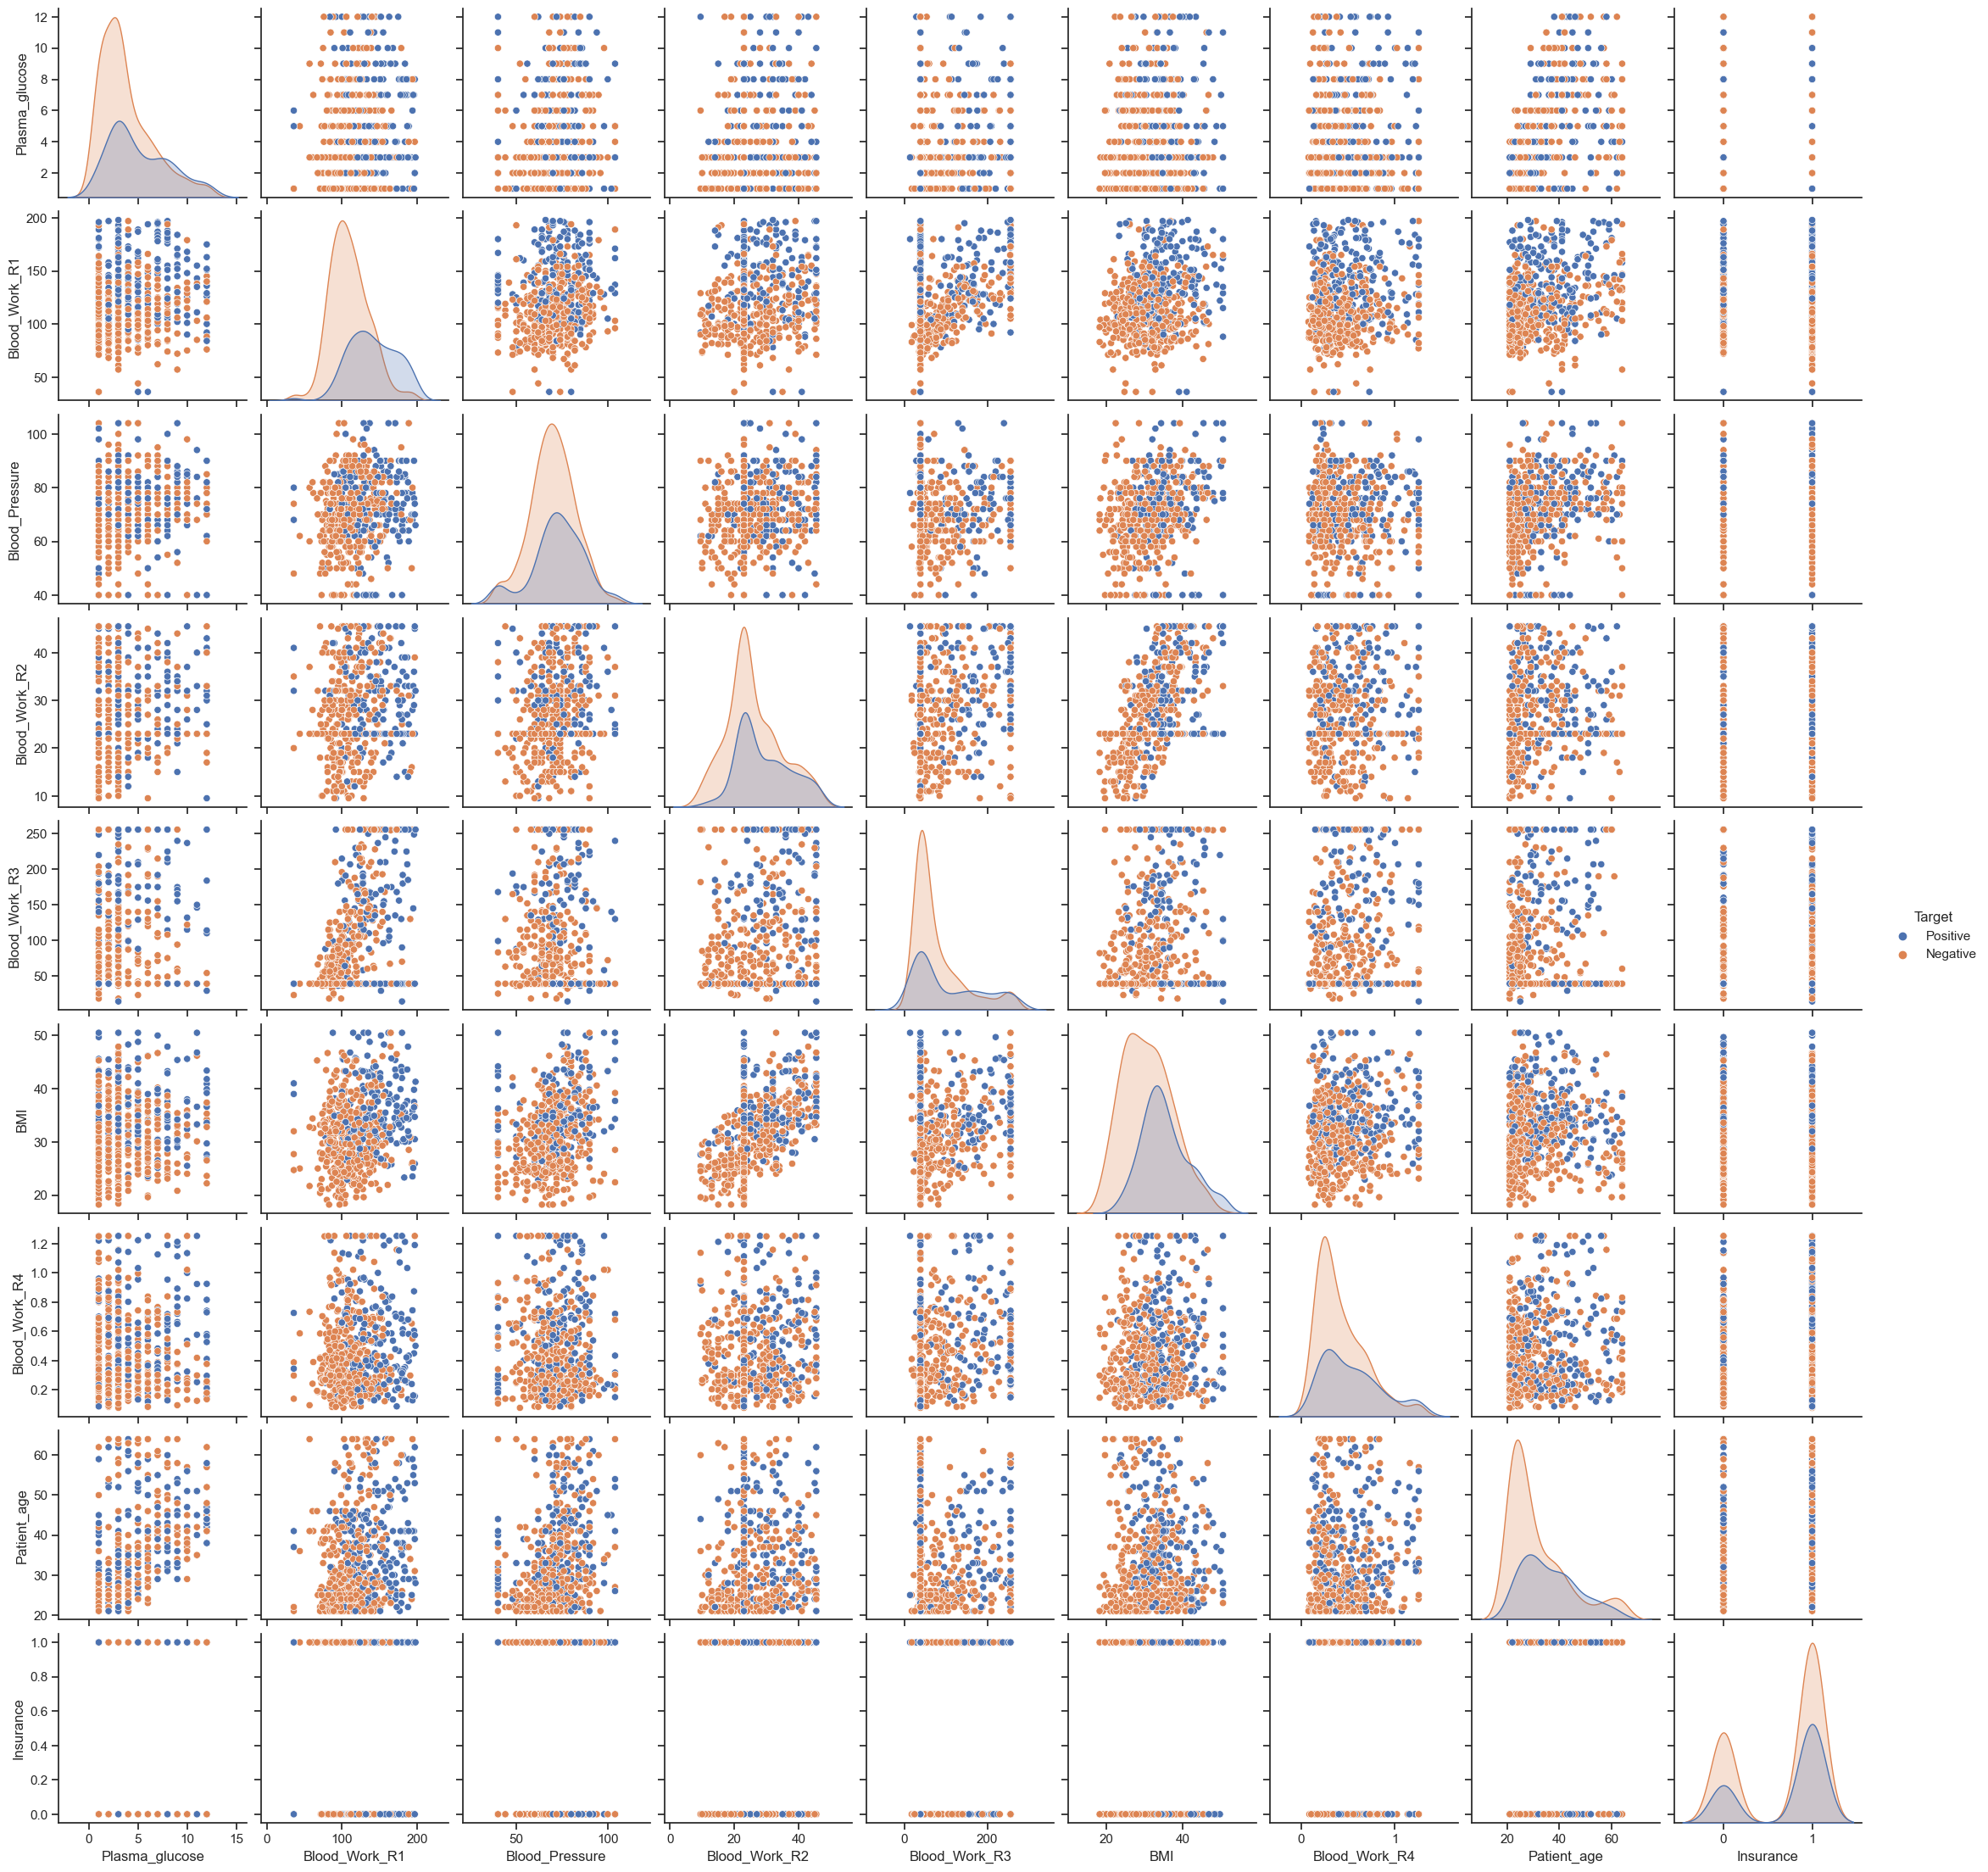

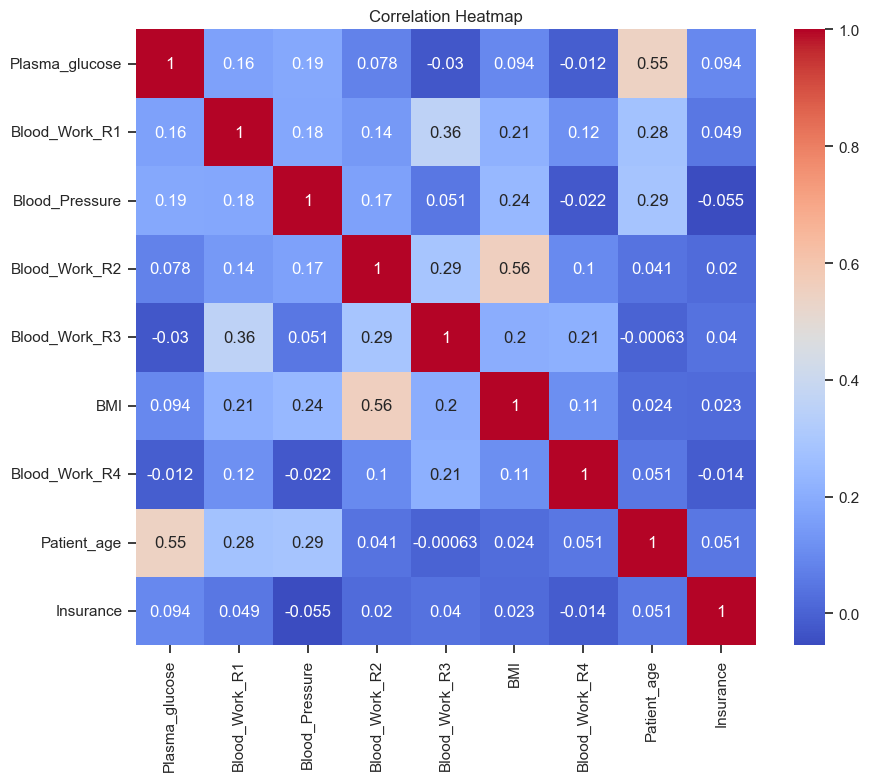

In [49]:
# Distribution of the target variable (Sepssis)
sn.countplot(x='Target', data=train_df)
plt.title('Distribution of Sepssis')
plt.show()

# Pairplot to visualize relationships between variables
sn.pairplot(train_df, hue='Target', diag_kind='kde')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sn.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

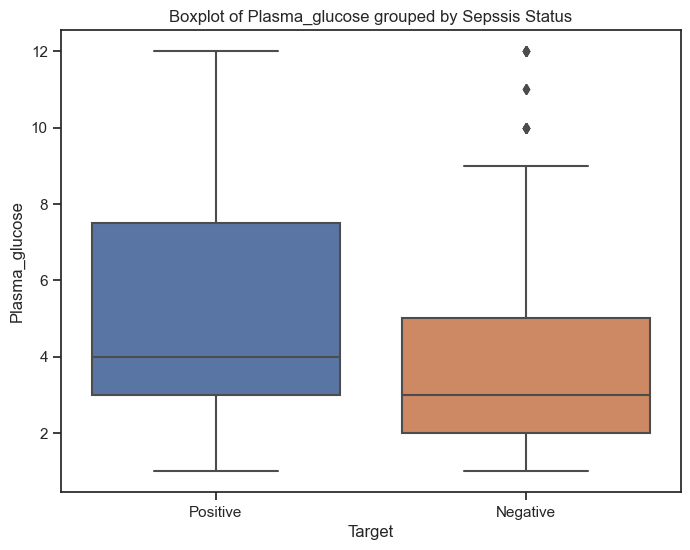

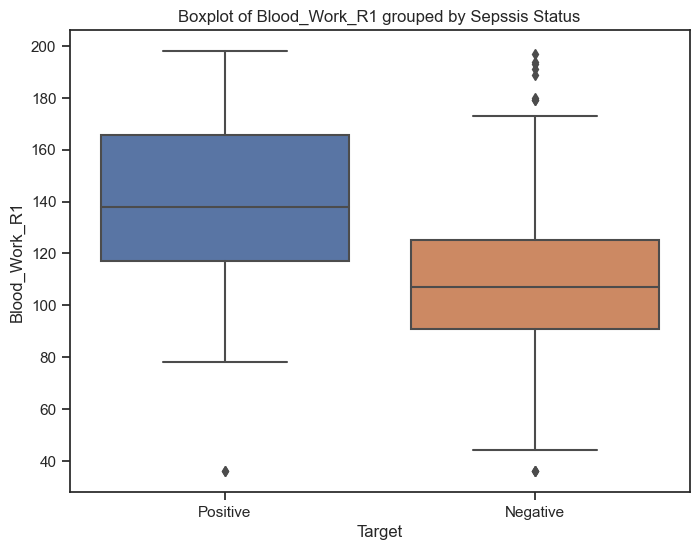

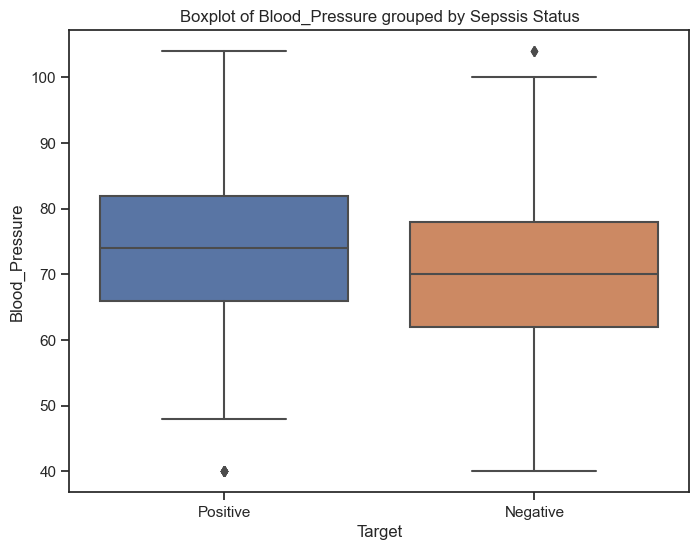

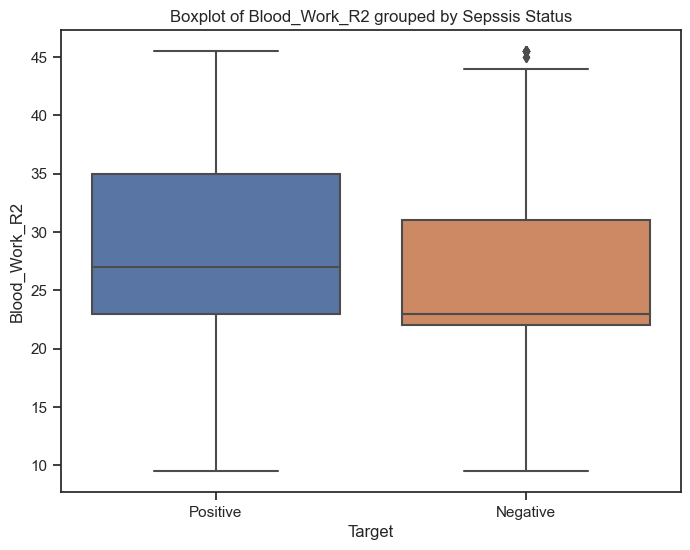

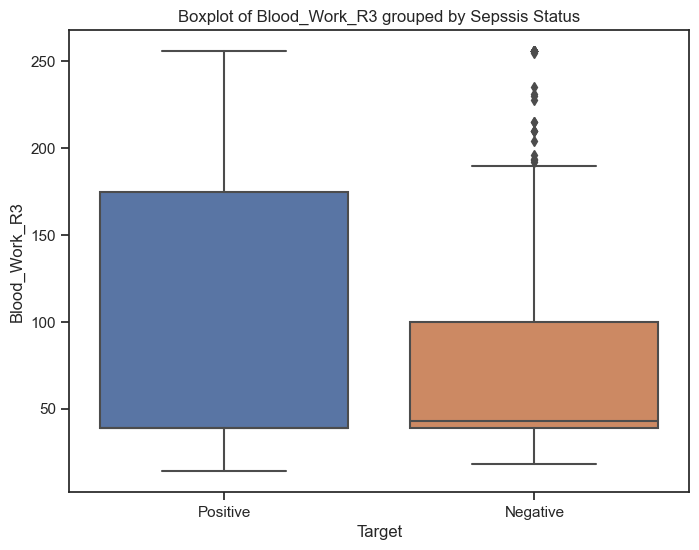

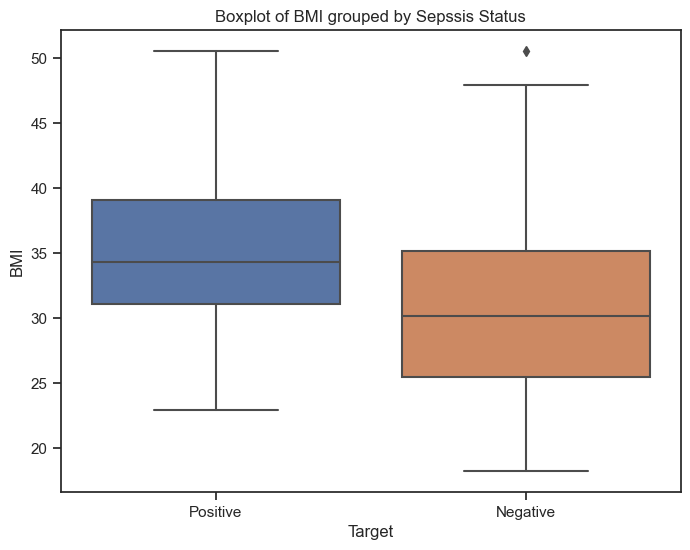

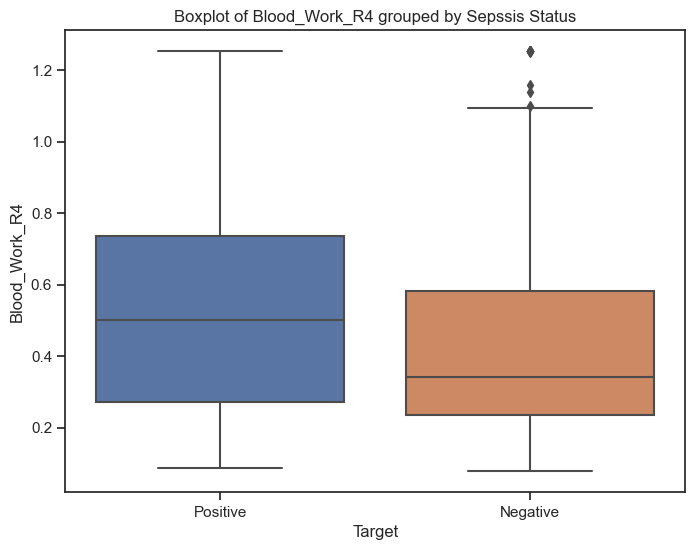

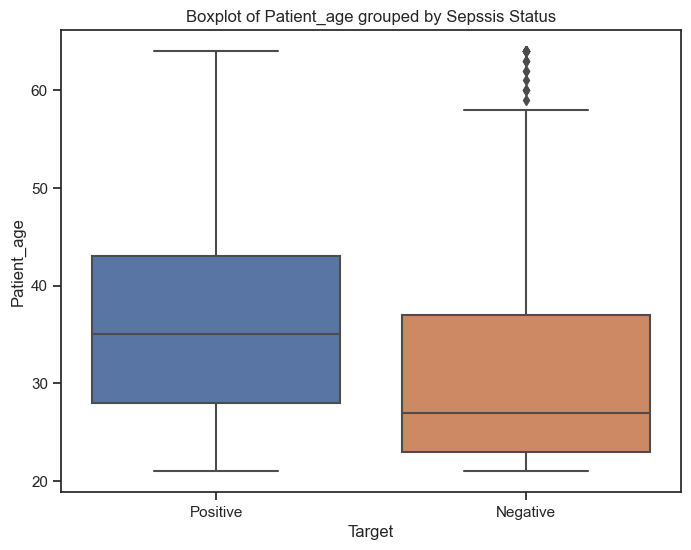

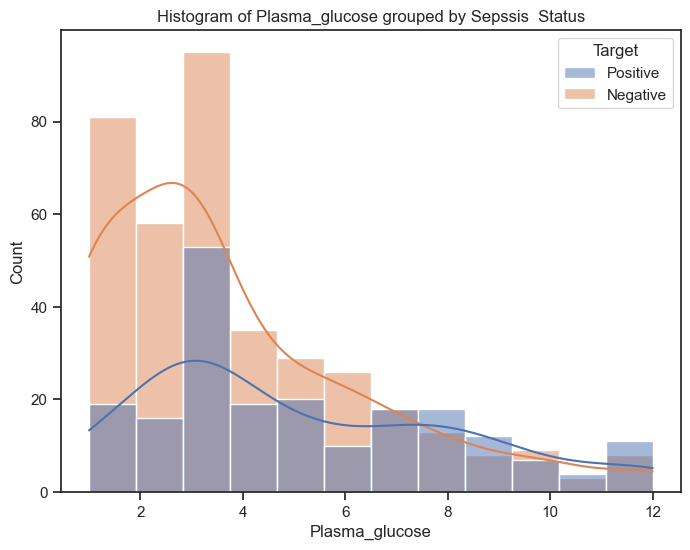

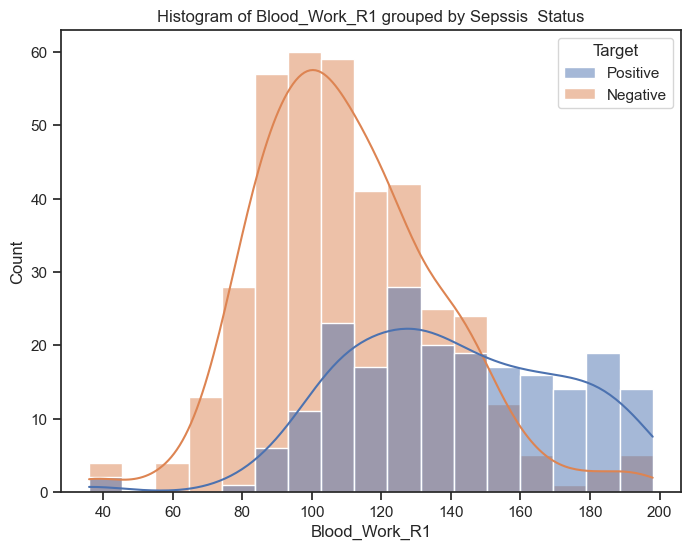

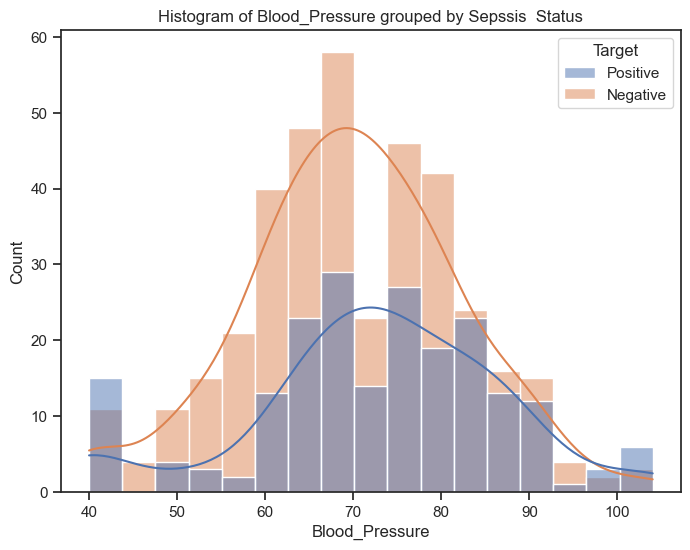

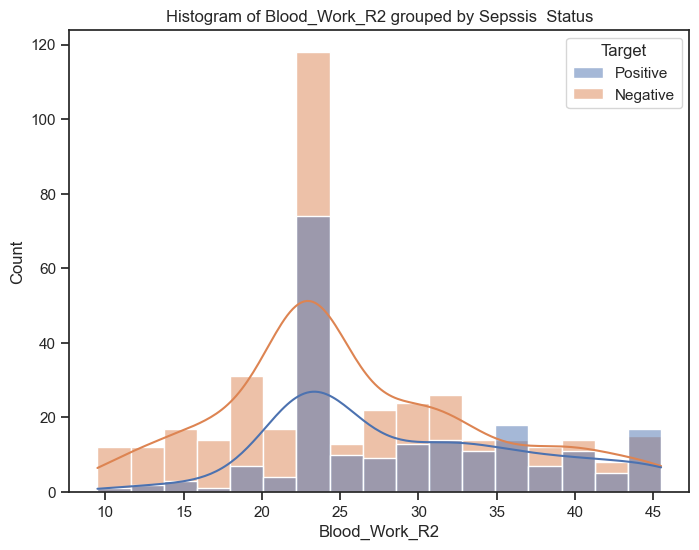

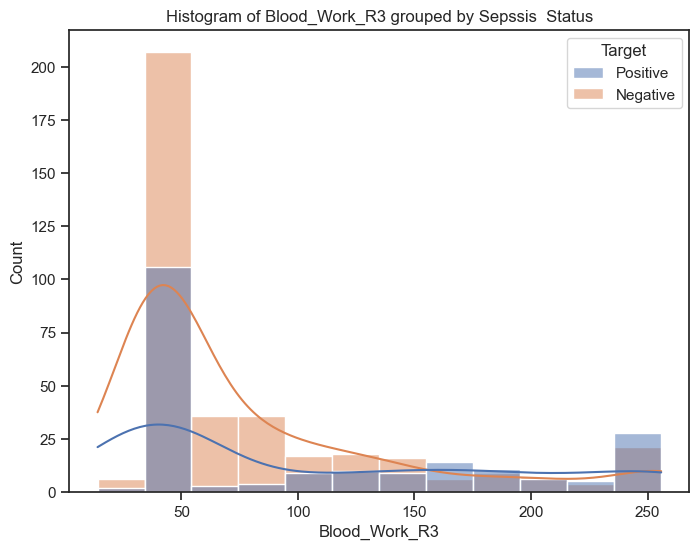

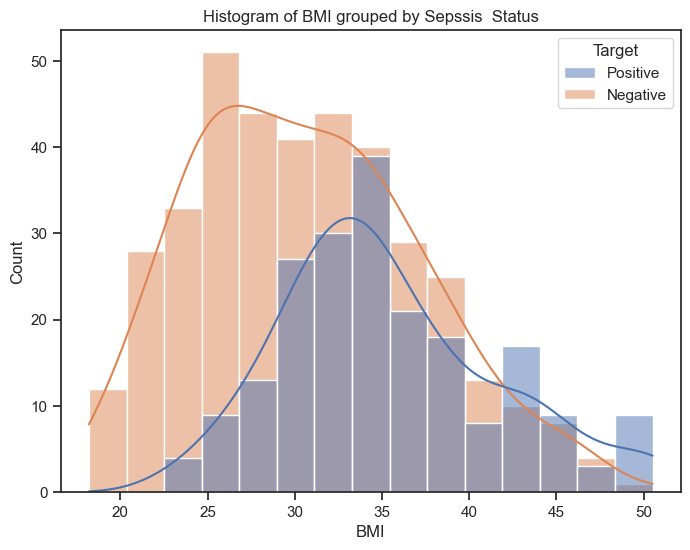

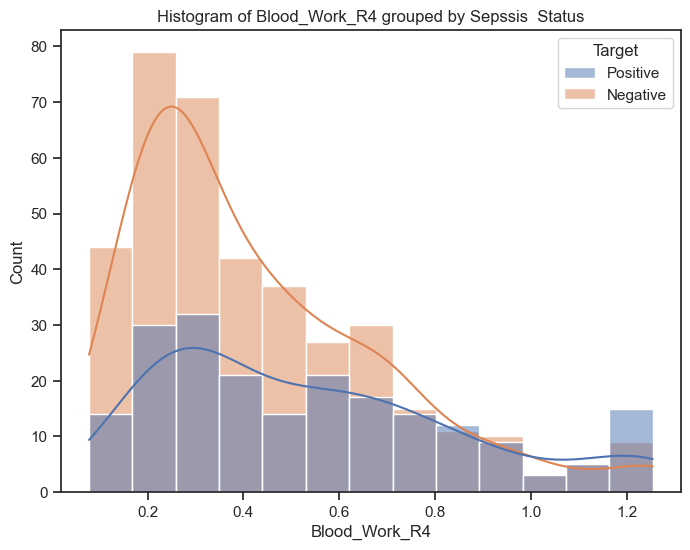

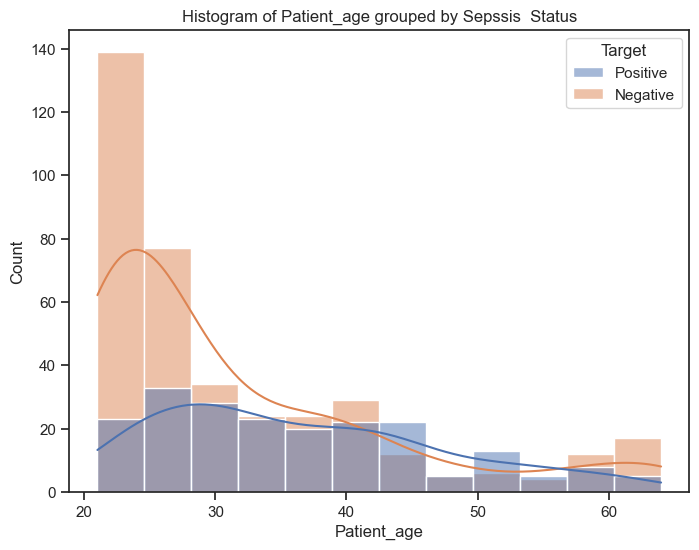

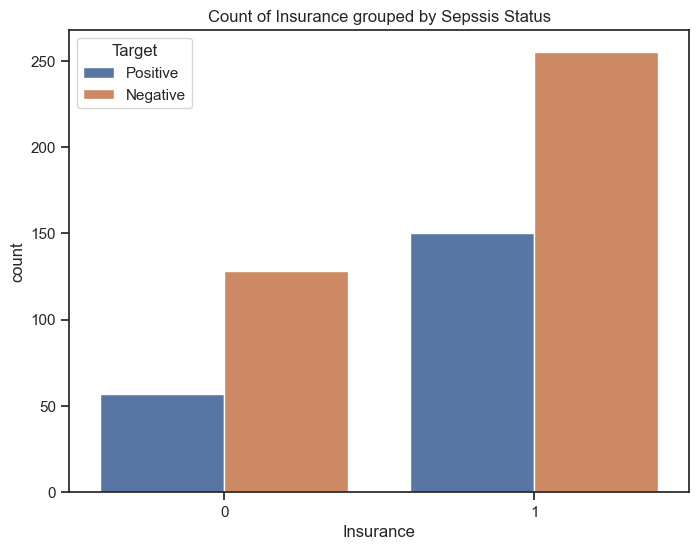

In [50]:
# Boxplots of numerical variables grouped by Sepssis Target
numeric_columns = ['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2', 'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Patient_age']
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sn.boxplot(x='Target', y=column, data=train_df)
    plt.title('Boxplot of ' + column + ' grouped by Sepssis Status')
    plt.show()

# Histograms of numerical variables grouped by Sepssis Target
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sn.histplot(data=train_df, x=column, hue='Target', kde=True)
    plt.title('Histogram of ' + column + ' grouped by Sepssis  Status')
    plt.show()

# Bar plots of categorical variable (Insurance) grouped by Sepssis Target
plt.figure(figsize=(8, 6))
sn.countplot(x='Insurance', hue='Target', data=train_df)
plt.title('Count of Insurance grouped by Sepssis Status')
plt.show()

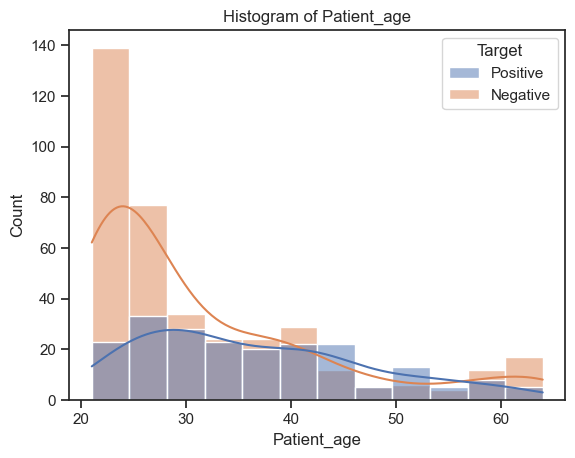

In [51]:
sn.histplot(data=train_df, x='Patient_age', hue='Target', alpha=0.5, kde=True)
plt.title(f'Histogram of Patient_age')
plt.xlabel('Patient_age')
plt.ylabel('Count')
plt.show()

## Hypothesis Validation 

In [52]:
# Split the data into two groups based on the Sepssis variable
target_positive = train_df[train_df['Target'] == 'Positive']
target_negative= train_df[train_df['Target'] == 'Negative']

# Extract the Age(Patient_age) values for each group
age_target_positive = target_positive['Patient_age']
age_target_negative = target_negative['Patient_age']

# Perform independent samples t-test
t_statistic, p_value = ttest_ind(age_target_positive, age_target_negative)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 5.1556614056454775
P-Value: 3.4577022949183645e-07


In [53]:
print("Based on the t-test results, the t-statistic value is {} and the p-value is {}.".format(t_statistic, p_value))
print("\nInterpreting the results:")
print("T-Statistic: The t-statistic measures the difference between the means of the two groups (positive and negative Sepssis Target) relative to the variability within each group. In this case,the t-statistic value of {} indicates a substantial difference in the mean age between the two groups.".format(t_statistic))
print("P-Value: The p-value is a measure of the statistical significance of the t-test results.In this case,the p-value is very small, which is less than commonly used significance levels like 0.05 or 0.01.This indicates strong evidence against the null hypothesis.")
print("\nInterpretation: With a t-statistic of {} and a very small p-value of {}, we can conclude that there is a significant difference in the mean age between patients with a positive Sepssis status and those with a negative Sepssis status. The results suggest that age may play a role in determining the likelihood of developing sepsis.".format(t_statistic, p_value))


Based on the t-test results, the t-statistic value is 5.1556614056454775 and the p-value is 3.4577022949183645e-07.

Interpreting the results:
T-Statistic: The t-statistic measures the difference between the means of the two groups (positive and negative Sepssis Target) relative to the variability within each group. In this case,the t-statistic value of 5.1556614056454775 indicates a substantial difference in the mean age between the two groups.
P-Value: The p-value is a measure of the statistical significance of the t-test results.In this case,the p-value is very small, which is less than commonly used significance levels like 0.05 or 0.01.This indicates strong evidence against the null hypothesis.

Interpretation: With a t-statistic of 5.1556614056454775 and a very small p-value of 3.4577022949183645e-07, we can conclude that there is a significant difference in the mean age between patients with a positive Sepssis status and those with a negative Sepssis status. The results suggest 

### Answers

#### 1. Is the train dataset complete

In [54]:
train_df.isnull().sum()

ID                0
Plasma_glucose    0
Blood_Work_R1     0
Blood_Pressure    0
Blood_Work_R2     0
Blood_Work_R3     0
BMI               0
Blood_Work_R4     0
Patient_age       0
Insurance         0
Target            0
dtype: int64

There are no missing values in the dataset 

#### 2. What are the ages of the youngest and oldest patients

In [55]:
oldest_age = train_df['Patient_age'].max()
youngest_age= train_df['Patient_age'].min()

In [56]:
print(f'The youngest and oldest patients are {youngest_age} and {oldest_age} years respectively')

The youngest and oldest patients are 21 and 64 years respectively


#### 3. What are the youngest and oldest patients with Sepssis?

In [57]:
highest_positive_age = positive_age_stats['max']
lowest_positive_age = positive_age_stats['min']

In [58]:
print(f'The youngest and oldest patient with Sepssis is {lowest_positive_age} and {highest_positive_age} years respectively')

The youngest and oldest patient with Sepssis is 21.0 and 64.0 years respectively


#### 4. What is the average age ?


In [59]:
average_age = train_df['Patient_age'].mean()
print(f'The Average age is {average_age:.2f} years old')

The Average age is 33.32 years old


#### 5. What is the ratio of patients who are positive for sepssis to the negative patients ?


In [60]:
# Calculate the count of positive and negative patients
positive_count = train_df[train_df['Target'] == 'Positive'].shape[0]
negative_count = train_df[train_df['Target'] == 'Negative'].shape[0]

# Calculate the ratio
ratio = positive_count / negative_count

print(f'The ratio of patientrs positive for sepssis to negative patients is {ratio:.2f}')

The ratio of patientrs positive for sepssis to negative patients is 0.54


#### 6.What is the highest and lowest BMI?


In [61]:
highest_bmi = train_df['BMI'].max()
lowest_bmi= train_df['BMI'].min()

print(f'The highest and lowest BMI is {highest_bmi:.2f} and {lowest_bmi:.2f} respectively')

The highest and lowest BMI is 50.51 and 18.20 respectively


#### 7.What is the average BMI ?


In [62]:
average_bmi = train_df['BMI'].mean()

print(f'The average BMI is {average_bmi:.2f}')

The average BMI is 32.34


#### 8.Is there a corelation between the Sepssis status and the other attributes?

In [63]:
# Replace "Positive" with 1 and "Negative" with 0
train_df['Target'] = train_df['Target'].replace({'Positive': 1, 'Negative': 0})

# Print the updated DataFrame
train_df.head(5)

ID  Plasma_glucose  Blood_Work_R1  Blood_Pressure  Blood_Work_R2  \
0  ICU200010               6            148              72           35.0   
1  ICU200011               1             85              66           29.0   
2  ICU200012               8            183              64           23.0   
3  ICU200013               1             89              66           23.0   
4  ICU200014               3            137              40           35.0   

   Blood_Work_R3   BMI  Blood_Work_R4  Patient_age  Insurance  Target  
0           39.0  33.6       0.627000           50          0       1  
1           39.0  26.6       0.351000           31          0       0  
2           39.0  23.3       0.672000           32          1       1  
3           94.0  28.1       0.167000           21          1       0  
4          168.0  43.1       1.253375           33          1       1

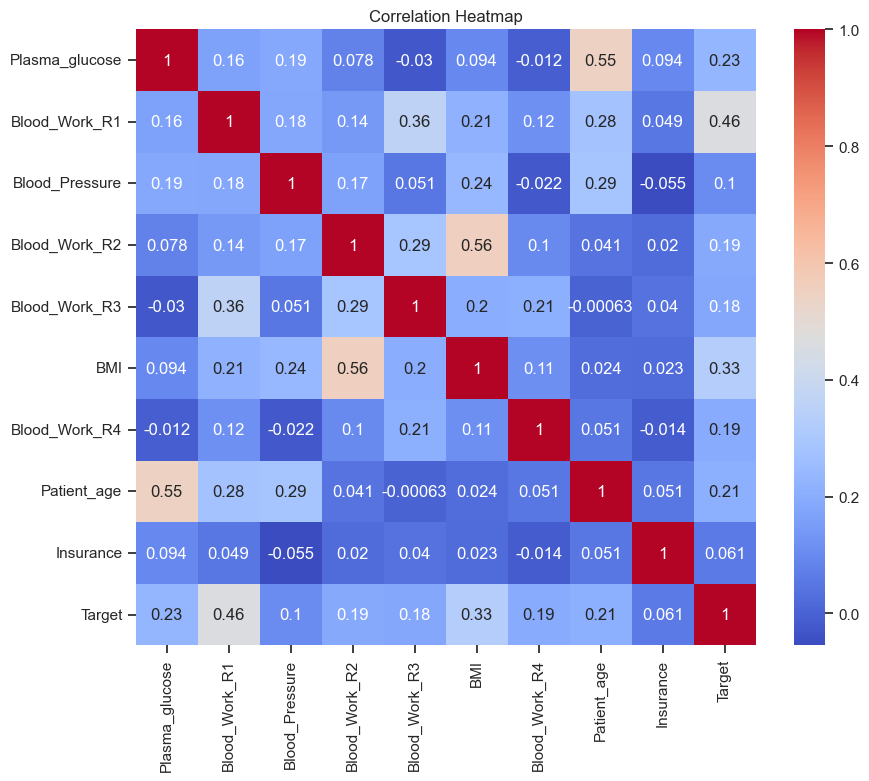

In [64]:
# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [65]:
# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Create a DataFrame from the correlation matrix
correlation_table = pd.DataFrame(correlation_matrix)

# Print the correlation table
correlation_table

Plasma_glucose  Blood_Work_R1  Blood_Pressure  Blood_Work_R2  \
Plasma_glucose        1.000000       0.164924        0.187246       0.078394   
Blood_Work_R1         0.164924       1.000000        0.180229       0.141614   
Blood_Pressure        0.187246       0.180229        1.000000       0.165403   
Blood_Work_R2         0.078394       0.141614        0.165403       1.000000   
Blood_Work_R3        -0.029692       0.357874        0.051215       0.287847   
BMI                   0.094152       0.213235        0.239710       0.557861   
Blood_Work_R4        -0.012405       0.118293       -0.021847       0.099839   
Patient_age           0.545355       0.275488        0.285171       0.040639   
Insurance             0.093681       0.049220       -0.054670       0.019879   
Target                0.230434       0.461401        0.104477       0.189483   

                Blood_Work_R3       BMI  Blood_Work_R4  Patient_age  \
Plasma_glucose      -0.029692  0.094152      -0.012405     0.545355   
Blood_Work_R1        0.357874  0.213235       0.118293     0.275488   
Blood_Pressure       0.051215  0.239710      -0.021847     0.285171   
Blood_Work_R2        0.287847  0.557861       0.099839     0.040639   
Blood_Work_R3        1.000000  0.201437       0.211890    -0.000626   
BMI                  0.201437  1.000000       0.112384     0.024130   
Blood_Work_R4        0.211890  0.112384       1.000000     0.050777   
Patient_age         -0.000626  0.024130       0.050777     1.000000   
Insurance            0.039830  0.022514      -0.013676     0.051362   
Target               0.182796  0.328562       0.194584     0.207967   

                Insurance    Target  
Plasma_glucose   0.093681  0.230434  
Blood_Work_R1    0.049220  0.461401  
Blood_Pressure  -0.054670  0.104477  
Blood_Work_R2    0.019879  0.189483  
Blood_Work_R3    0.039830  0.182796  
BMI              0.022514  0.328562  
Blood_Work_R4   -0.013676  0.194584  
Patient_age      0.051362  0.207967  
Insurance        1.000000  0.060528  
Target           0.060528  1.000000

In [66]:

# Set the threshold for high correlation
threshold = 0.5

# Find the highly correlated variables
high_correlation = (correlation_matrix.abs() > threshold) & (correlation_matrix != 1)

# Get the variable pairs with high correlation
high_correlation_pairs = [(i, j) for i in high_correlation.columns for j in high_correlation.columns if high_correlation.loc[i, j]]

# Print the highly correlated variables
for pair in high_correlation_pairs:
    var1, var2 = pair
    correlation_value = correlation_matrix.loc[var1, var2]
    print(f"{var1} and {var2} are highly correlated (correlation value: {correlation_value})")


Plasma_glucose and Patient_age are highly correlated (correlation value: 0.5453549090984394)
Blood_Work_R2 and BMI are highly correlated (correlation value: 0.5578613433299704)
BMI and Blood_Work_R2 are highly correlated (correlation value: 0.5578613433299704)
Patient_age and Plasma_glucose are highly correlated (correlation value: 0.5453549090984394)


## Feature Processing and Engineering

In [67]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590 entries, 0 to 598
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              590 non-null    object 
 1   Plasma_glucose  590 non-null    int64  
 2   Blood_Work_R1   590 non-null    int64  
 3   Blood_Pressure  590 non-null    int64  
 4   Blood_Work_R2   590 non-null    float64
 5   Blood_Work_R3   590 non-null    float64
 6   BMI             590 non-null    float64
 7   Blood_Work_R4   590 non-null    float64
 8   Patient_age     590 non-null    int64  
 9   Insurance       590 non-null    int64  
 10  Target          590 non-null    int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 55.3+ KB


#### Check and Drop Duplicates 

In [68]:
#Check for duplicate rows in data
duplicate_rows = train_df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 0


#### Impute Missing Values 

In [69]:
missing_values = train_df.isna().sum()
print(missing_values)

ID                0
Plasma_glucose    0
Blood_Work_R1     0
Blood_Pressure    0
Blood_Work_R2     0
Blood_Work_R3     0
BMI               0
Blood_Work_R4     0
Patient_age       0
Insurance         0
Target            0
dtype: int64


## Feature Encoding

##### Removing Columns 

In [70]:
# Since Plasma_Glucose and Patient_age are highly correlated, we will remove Plasma_Glucose 
# We will remove Blood_work_R2 since it is also highly correlated to BMI
# We will remove the ID column
# we drop Insuarnce as well since it isnt a relevant field 

In [71]:
train_df.drop('Blood_Work_R2',axis=1,inplace=True)
train_df.drop('Plasma_glucose',axis=1,inplace=True)
train_df.drop('ID',axis=1,inplace=True)
train_df.drop('Insurance',axis=1,inplace=True)

In [72]:
train_df

Blood_Work_R1  Blood_Pressure  Blood_Work_R3   BMI  Blood_Work_R4  \
0              148              72           39.0  33.6       0.627000   
1               85              66           39.0  26.6       0.351000   
2              183              64           39.0  23.3       0.672000   
3               89              66           94.0  28.1       0.167000   
4              137              40          168.0  43.1       1.253375   
..             ...             ...            ...   ...            ...   
594            123              72          230.0  33.6       0.733000   
595            188              82          185.0  32.0       0.682000   
596             67              76           39.0  45.3       0.194000   
597             89              40           25.0  27.8       0.559000   
598            173              74           39.0  36.8       0.088000   

     Patient_age  Target  
0             50       1  
1             31       0  
2             32       1  
3             21       0  
4             33       1  
..           ...     ...  
594           34       0  
595           22       1  
596           46       0  
597           21       0  
598           38       1  

[590 rows x 7 columns]

## Data Spliting 

In [73]:
# Use train_test_split with a random_state, and add stratify for Classification
# Split the  data into train and validation sets
X_train, X_eval, y_train, y_eval = train_test_split(train_df.iloc[:, :-1], train_df.iloc[:, -1:],
                                                    test_size=0.2, random_state=42, stratify=train_df.iloc[:, -1:])


In [74]:
X_train.shape,X_eval.shape,y_train.shape,y_eval.shape

((472, 6), (118, 6), (472, 1), (118, 1))

In [75]:
X_train

Blood_Work_R1  Blood_Pressure  Blood_Work_R3      BMI  Blood_Work_R4  \
244            146              76          194.0  38.2000          0.329   
5              116              74           39.0  25.6000          0.201   
115            146              92           39.0  31.2000          0.539   
123            132              80           39.0  26.8000          0.186   
99             122              90          220.0  49.7000          0.325   
..             ...             ...            ...      ...            ...   
125             88              40           99.0  50.5125          0.496   
69             146              85          100.0  28.9000          0.189   
112             89              76           37.0  31.2000          0.192   
178            143              78           39.0  45.0000          0.190   
550            116              70           39.0  27.4000          0.204   

     Patient_age  
244           29  
5             30  
115           61  
123           64  
99            31  
..           ...  
125           26  
69            27  
112           23  
178           47  
550           21  

[472 rows x 6 columns]

In [76]:
y_train

Target
244       0
5         0
115       1
123       0
99        1
..      ...
125       1
69        0
112       0
178       0
550       0

[472 rows x 1 columns]

## Feature Scaling 

#### Checking to see if Our Data is Balanced 

In [77]:
# Count the occurrences of each class label
class_counts = train_df['Target'].value_counts()

# Print the class counts
print(class_counts)

# Calculate the class frequencies
class_frequencies = class_counts / len(train_df)

# Print the class frequencies
print(class_frequencies)

0    383
1    207
Name: Target, dtype: int64
0    0.649153
1    0.350847
Name: Target, dtype: float64


In [78]:
# Our dataset is imbalanced and we would have to Scale it 
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_train_df = pd.DataFrame(X_train_scaled, columns = ['Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Patient_age'])

X_eval_scaled = scaler.transform(X_eval)
X_eval_df = pd.DataFrame(X_eval_scaled, columns = ['Blood_Work_R1', 'Blood_Pressure','Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Patient_age'])

In [79]:
X_train_df.head()

Blood_Work_R1  Blood_Pressure  Blood_Work_R3       BMI  Blood_Work_R4  \
0       0.779617        0.400116       1.418805  0.891888      -0.487102   
1      -0.153630        0.247197      -0.718846 -0.988547      -0.929170   
2       0.779617        1.623467      -0.718846 -0.152798       0.238166   
3       0.344102        0.705954      -0.718846 -0.809458      -0.980975   
4       0.033020        1.470548       1.777378  2.608157      -0.500917   

   Patient_age  
0    -0.353131  
1    -0.266590  
2     2.416179  
3     2.675802  
4    -0.180049

In [93]:
# Define the column names that were changed
changed_column_names = {
    'PRG':'Plasma_glucose',
    'PL': 'Blood_Work_R1',
    'PR': 'Blood_Pressure',
    'SK': 'Blood_Work_R2',
    'TS': 'Blood_Work_R3',
    'M11': 'BMI',
    'BD2': 'Blood_Work_R4',
    'Age': 'Patient_age',
    'Sepssis': 'Target',
}

# Define the columns to remove
columns_to_remove = ['Blood_Work_R2', 'Plasma_glucose', 'Insurance','ID']

# Create a ColumnTransformer for the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('rename', 'passthrough', list(changed_column_names.keys())),
        ('remove', 'drop', columns_to_remove),
        ('scale', StandardScaler(), slice(None)),  # Scale all remaining columns
    ]
)

# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Fit and transform the pipeline on train_df
X_train = train_df.drop(columns=['Target'])  # Adjust the target column name
y_train = train_df['Target']  # Adjust the target column name
pipeline.fit(X_train, y_train)

# Transform the test_df using the pipeline
X_test = test_df.copy()
X_test = pipeline.transform(X_test)

# Split the transformed test data into X_test and X_eval
X_test, X_eval, y_test, y_eval = train_test_split(X_test, y_test, test_size=0.2, random_state=42)

ValueError: A given column is not a column of the dataframe

By calling the fit method on the pipeline and passing the training data, the pipeline will sequentially apply each step to the data.

The pipeline will automatically fit the transformers in the appropriate order, applying any necessary preprocessing steps such as dropping duplicates, removing columns, and scaling. The final estimator in the pipeline (if present) will also be fitted on the transformed data.

In [97]:
# Custom function to remove columns from DataFrame
def remove_columns(data):
    columns_to_remove = ['Blood_Work_R2', 'Plasma_glucose', 'Insurance', 'ID']
    return data.drop(columns=columns_to_remove)

# Create the pipeline
pipeline = Pipeline([
    ('remove_columns', FunctionTransformer(remove_columns)),
    ('scaler', StandardScaler()),
    ('column_transformer', ColumnTransformer([('rename_columns', FunctionTransformer(lambda x: x.rename(columns={'PRG': 'PGR'})), ['PRG'])], remainder='passthrough')),
    ('split', FunctionTransformer(lambda x: train_test_split(x, test_size=0.2))),
    ('linear_regression', TransformedTargetRegressor(regressor=LinearRegression(), transformer=StandardScaler()))
])

# Fit the pipeline on train_df
pipeline.fit(train_df)

# Transform the test_df using the pipeline
test_df_processed = pipeline.transform(test_df)
X_test = test_df_processed[0]
X_eval = test_df_processed[1]

NameError: name 'LinearRegression' is not defined

# Machine Learing Model 

#### Here is the section to build, train, evaluate and compare the models to each others.

## Simple Model #001

In [ ]:
#fit logistic regression model on train data
Lrmodel = LogisticRegression()
Lrmodel.fit(X_train_df, y_train)

#make predictions on validation set
Lrpreds = Lrmodel.predict(X_eval_df)

f1Score =f1_score(y_eval, Lrpreds)
f1Score

In [ ]:
# Calculate the false positive rate, true positive rate, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_eval, Lrpreds)

# Calculate the AUC (Area Under the Curve) using roc_auc_score
auc_score = roc_auc_score(y_eval, Lrpreds)
auc_score

In [ ]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The AUC score is a measure of the ability of a model to distinguish between two classes. 
It is calculated by plotting the true positive rate (TPR) against the false positive rate (FPR). 
The TPR is the proportion of positive data points that are correctly classified, 
and the FPR is the proportion of negative data points that are incorrectly classified.
Our AUC score of 0.7220462464364903 indicates that the model is able to correctly classify 72.20% of the data points. 
This is a good score, and it suggests that the model is able to distinguish between the two classes fairly well.

In [ ]:
# Instanciate the model

lr = LogisticRegression(random_state=42)

In [ ]:
# Train the model on the training set

lr.fit(X_train, y_train)

In [ ]:
y_pred = lr.predict(X_eval)

In [ ]:
y_pred

In [ ]:
#classification report for the model's performance on the eval set.
LRM=(classification_report(y_eval, y_pred))


print(LRM)

In [ ]:
# Predicting on an unkown dataset

test_pred = lr.predict(X_test)